# Practice 6

## Problem 1

Save a spectra from the Plank's function to a file and open in.

Hint: use a = np.stack((x, y), axis=1) to combine data before writing to the file.

Yesterday's function:

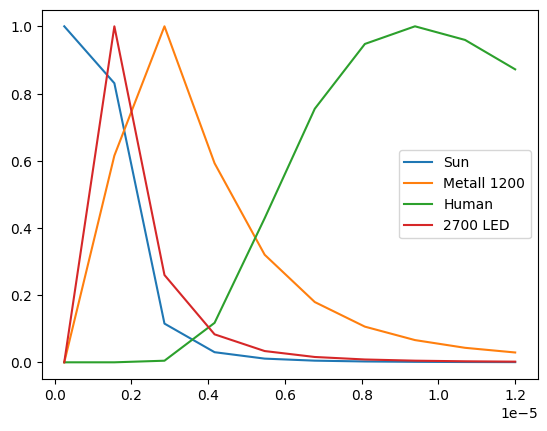

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def bbplank(l, T: float):
    k = 1.38e-23 
    c = 3e8
    h = 6.62e-34
    result = 2*h*c**2/(l**5)*1/(np.exp(h*c/(l*k*T))-1)
    return result

scale = 1e-9
x = scale * np.linspace(250, 12000, 10)

objects = {'Sun': 5250 + 273, 'Metall 1200': 1200, 'Human': 37 + 273}

objects['2700 LED'] = 2700

collect = []
for item, temp in objects.items():
    i = bbplank(x, temp)
    plt.plot(x, i/np.max(i), label=item)
    collect.append(i)
    #plt.plot(x, i, label=item)


plt.legend()
plt.show()

In [58]:
'''
print(x)
print(collect)

for n, i in enumerate(collect):
    x = np.stack((x, collect[n]), axis=1)
    print(x)
spectra = x

'''
spectra = np.stack([x] + collect, axis=1)


# spectra = np.stack((x, collect[0], collect[1], collect[2]), axis=1)
print(spectra)

header =  'Wavelength,' +  ','.join([i for i in objects])# from objects
print(header)
filename = "./spectra.csv"
np.savetxt(filename, spectra, header=header) # 'Wavelength, Sun, Metall, Human')



[[2.50000000e-07 3.62970669e+12 1.79012586e-04 2.75703645e-64
  6.71546794e+07]
 [1.55555556e-06 3.01496760e+12 5.87014835e+09 1.43133244e+00
  4.39482518e+11]
 [2.86111111e-06 4.18212454e+11 9.54261011e+09 5.58110384e+04
  1.14193205e+11]
 [4.16666667e-06 1.09194099e+11 5.65338888e+09 1.37541489e+06
  3.65796916e+10]
 [5.47222222e-06 3.98158881e+10 3.05482247e+09 5.02420369e+06
  1.47298012e+10]
 [6.77777778e-06 1.77706359e+10 1.71155571e+09 8.84112267e+06
  6.96857658e+09]
 [8.08333333e-06 9.07749782e+09 1.01287466e+09 1.11011068e+07
  3.69833768e+09]
 [9.38888889e-06 5.10611608e+09 6.31323454e+08 1.17161621e+07
  2.13720146e+09]
 [1.06944444e-05 3.08738479e+09 4.11668442e+08 1.12409288e+07
  1.31840621e+09]
 [1.20000000e-05 1.97458449e+09 2.78961854e+08 1.02156659e+07
  8.56353817e+08]]
Wavelength,Sun,Metall 1200,Human,2700 LED


## Problem 2

Compare txt and binary files (check files in ./practice_6_data/ascii_vs_binary folder)

A hint: to view a binary data you can use powerpoint with command "format-hex filename" or ("format-hex filename > binary.txt" and open binary.txt)

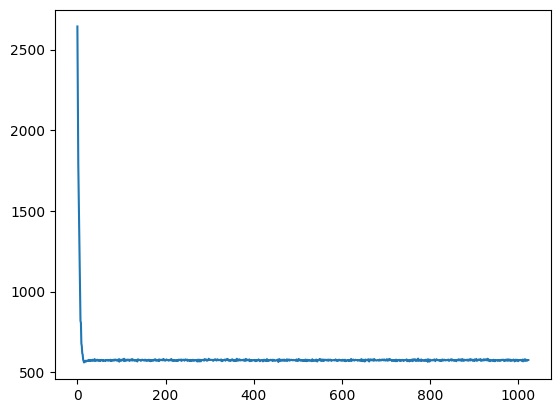

In [30]:
path = './practice_6_data/ascii_vs_binary/'
filename_bin = '-60 30 sec.dat'
filename_txt = 'ccd -60C.asc'


txt_data = np.loadtxt(path + filename_txt)

plt.plot(txt_data[: , 1])
plt.show()

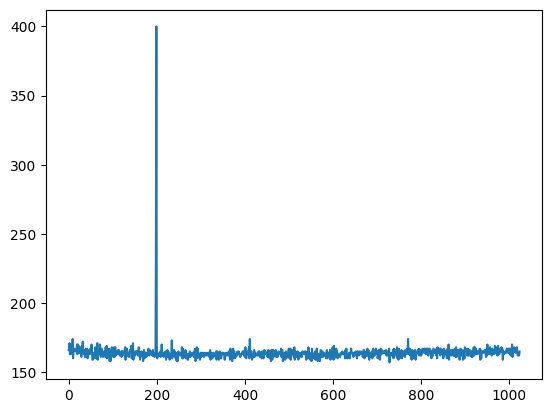

In [41]:
with open(path + filename_bin, 'rb') as file:
    raw_str = file.read()

#print(raw_str)

spectrum = []

for i in range(len(raw_str)//2):
    dbyte = raw_str[i*2 : i*2 + 2]
    int1 = int.from_bytes(dbyte, 'little') 
    spectrum.append(int1)

plt.plot(spectrum)

## Problem3

Open files with LED spectra from ./practice_6_data/3LED/s.

    Open LED_royalBlue.csv, plot and normalize a spectrum. Save it in a *.csv file.
    Open LED280nm.csv, plot spectra, select suitable curves, normalize, calculate average and save it to a file.
    Do the same with LED370nm.csv.
    Plot normalize and average spectra of LEDs

Pay attention to the data structure in the files:

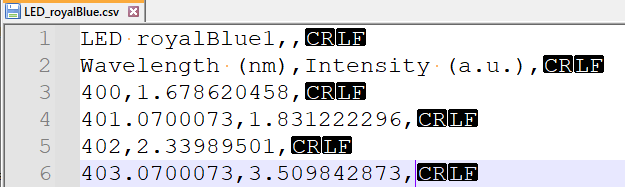

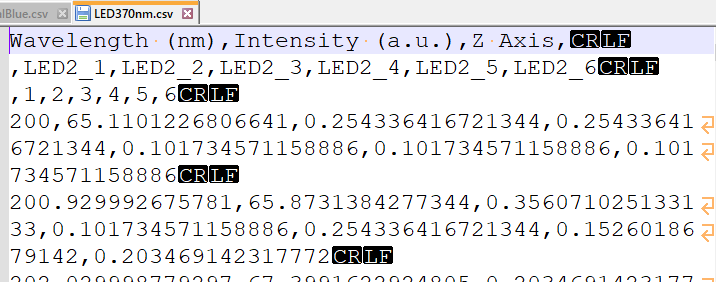

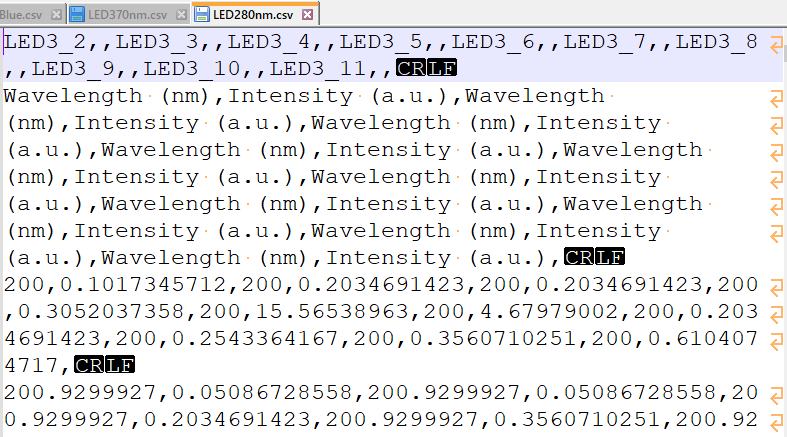

(301, 7)


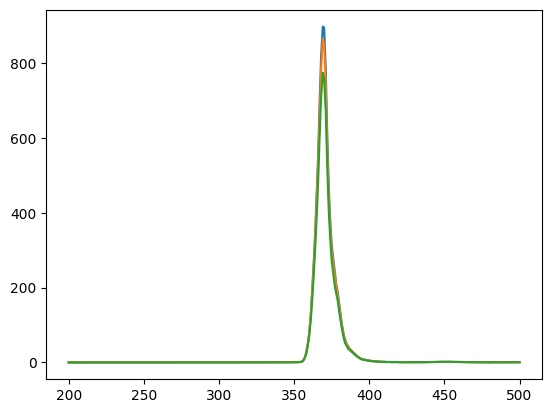

In [50]:
path = './practice_6_data/3LEDs/'
filename = 'LED370nm.csv'


txt_data = np.loadtxt(path + filename, skiprows=3, delimiter=',', max_rows=301)

print(np.shape(txt_data))
np.shape(txt_data)

for i in range(4, np.shape(txt_data)[1]):
    plt.plot(txt_data[: , 0], txt_data[: , i])




plt.show()

(301, 11)


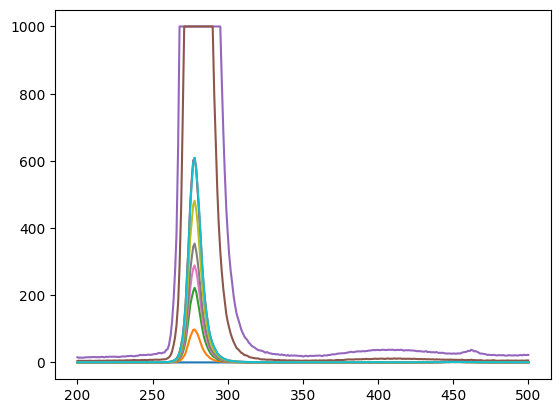

In [54]:
path = './practice_6_data/3LEDs/'
filename = 'LED280nm.csv'


txt_data = np.loadtxt(path + filename, skiprows=2, delimiter=',', max_rows=301, usecols=([0] + list(range(1, 20, 2))))

print(np.shape(txt_data))
np.shape(txt_data)

for i in range(1, np.shape(txt_data)[1]):
    plt.plot(txt_data[: , 0], txt_data[: , i])




plt.show()